you can find datasets in kaggle , check readme for datasets links . Also you can see these notebook from my kaggle page , you can find link in readme file

In [1]:
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 """

/kaggle/input/chess/games.csv


**importing libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# reading dataset
df=pd.read_csv("datasets/games.csv")
df.head(3)

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   

  increment_code  white_id  white_rating   black_id  black_rating  \
0           15+2  bourgris          1500       a-00          1191   
1           5+10      a-00          1322  skinnerua          1261   
2           5+10    ischia          1496       a-00          1500   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4  
2   King's Pawn Game: Leonardis Variation            3

# Explore Dataset

In [3]:
# lets explore dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
# drop unuseful column
df.drop(["created_at","last_move_at"],axis=1,inplace=True) 

In [5]:
# lets check player id's so we can understand that whether
#   some player played more than one match or not
# consider white id's

df["white_id"].value_counts()   # player named taranga guy played 72 match in white side 

white_id
taranga          72
chess-brahs      53
a_p_t_e_m_u_u    49
ssf7             48
bleda            48
                 ..
gw22              1
shiftas           1
juiz_moro         1
messiosousa       1
marcodisogno      1
Name: count, Length: 9438, dtype: int64

# Create new Columns for more information

In [6]:
# lets create our own level system for two opponent with the help of their rating

level_list=[]
def level_creator(rating):
    level=str()
    if rating<=1100:
        level="rookie"
    elif 1100<rating<=1600:
        level="beginner"
    elif 1600<rating<=2000:
        level="intermediate"
    elif 2000<rating<=2300:
        level="advance"
    elif 2300<rating<=3000:
        level="expert"
    elif rating>3000:
        level="super-GM"
    level_list.append(level)

In [7]:
df["white_rating"].map(level_creator) # use map for interact  values
df["white level"]=level_list

level_list=[]    # recreate this list beacuse we will use it for blacks

df["black_rating"].map(level_creator)
df["black level"]=level_list

In [8]:
 # lets check our new columns
print(df["white level"].value_counts())
print("\n")
print(df["black level"].value_counts())

white level
beginner        10181
intermediate     7394
advance          1578
rookie            689
expert            216
Name: count, dtype: int64


black level
beginner        10296
intermediate     7229
advance          1604
rookie            749
expert            180
Name: count, dtype: int64


In [9]:
# lets create level point column we will use this column to create match quality column for example if two 2500 rating player played match this match is high quality
# if two 1200 rating player played match this match is poor quality
# we will use match quality columns in further analysis

plist=[]     # i will use this list to create new column 
def level_pointer(level):
    point=int()
    if level=="rookie":
        point=1
    elif level=="beginner":
        point=2
    elif level=="intermediate":
        point=3
    elif level=="advance":
        point=4
    elif level=="expert":
        point=5
    elif level=="super-GM":
        point=6
    plist.append(point)

In [10]:
df["white level"].map(level_pointer)
df["white level point"]=plist

plist=[]

df["black level"].map(level_pointer)
df["black level point"]=plist

In [11]:
# now we can create match quality column , we will use level point columns
#   black level point + white level point value will decide match quality
quallist=[]  
def total(a,b):
    qual= a+b
    qual_str=str()
    if qual<=3:
        qual_str="poor"
    elif 3<qual<=5:
        qual_str="fair"
    elif 5<qual<=7:
        qual_str="good"
    elif 7<qual<=10:
        qual_str="excellent"
    quallist.append(qual_str)

# use apply for interact with dataframe's multiple columns 
df['match quality'] = df.apply(lambda x: total(x["white level point"], x["black level point"]), axis=1) 

In [12]:
df["match quality"]=quallist # add  match quality column

In [13]:
 # lets look our dataset to see our new columns
    
df=df.sample(frac = 1) # lets shuffle our dataset (not important you dont have to do it)
df.head(5)

id  rated  turns victory_status winner increment_code  \
2685   0PqUU4BP   True     62         resign  black           10+0   
10521  uc2tMYfY   True     53         resign  white           30+1   
15433  UMU3AdIg   True     45           mate  white           10+0   
8887   6UP215gl   True     90         resign  black           15+0   
14495  SnNXDp7R   True     54           mate  black            5+5   

           white_id  white_rating    black_id  black_rating  \
2685      michal007          1853    ezatfoda          1809   
10521        tori92          2003        nolp          2078   
15433        mano99          1786     dazkins          1474   
8887         giigii          1020  javed-8168          1618   
14495  blackshelter          1416    fjachess          1571   

                                                   moves opening_eco  \
2685   c4 Nf6 Nc3 e6 g3 g6 Bg2 Bg7 d3 c6 b3 d5 d4 dxc...         A17   
10521  e4 e5 Nf3 Nc6 c3 d5 Qa4 Qd6 d4 Bd7 Bb5 dxe4 Nx...         C44   
15433  e4 e5 Nf3 Nc6 Bb5 d6 O-O Nf6 d3 Be7 h3 O-O Re1...         C66   
8887   e4 e5 Nf3 Nc6 c3 d6 Bc4 h6 d3 Nf6 O-O Be7 Bb3 ...         C44   
14495  d4 Nf6 Nf3 g6 c4 Bg7 Bg5 c5 Nc3 cxd4 Qxd4 Nc6 ...         E60   

                                            opening_name  opening_ply  \
2685   English Opening: Anglo-Indian Defense |  Hedge...            4   
10521                                   Ponziani Opening            5   
15433  Ruy Lopez: Berlin Defense |  Improved Steinitz...            8   
8887                                    Ponziani Opening            5   
14495  King's Indian Defense: Normal Variation |  Kin...            5   

        white level   black level  white level point  black level point  \
2685   intermediate  intermediate                  3                  3   
10521       advance       advance                  4                  4   
15433  intermediate      beginner                  3                  2   
8887         rookie  intermediate                  1                  3   
14495      beginner      beginner                  2                  2   

      match quality  
2685           good  
10521     excellent  
15433          fair  
8887           fair  
14495          fair

In [14]:
# lets create one more column , this will be the last column that we created 
# we will check whether high rating player win or not win
# create winner condition column
wlist=[]
def winner_check(data):
    winner_str=str()
    if data["white_rating"] < data["black_rating"] and data["winner"]=="white":
        winner_str="lower rating"
    else:
        winner_str="higher rating"
    
    if data["black_rating"] < data["white_rating"] and data["winner"]=="black":
        winner_str="lower rating"
    else:
        winner_str="higher rating"
        
    wlist.append(winner_str)
    
df.apply(winner_check,axis=1) # use apply to interact with dataset you can use other functions

2685     None
10521    None
15433    None
8887     None
14495    None
         ... 
7728     None
9918     None
10514    None
18771    None
8620     None
Length: 20058, dtype: object

In [15]:
df["winner condition"]=wlist # winner condition column

In [16]:
# in opening column some openings has subbranch --> 
# Caro-Kann Defense: Classical Variation
# Caro-Kann Defense: Modern Variation
# lets combine them in  Caro-Kann Defense (we can call this major opening)

# create major opening column
opening_list=[]
df["opening_name"].map(lambda x:opening_list.append(x.split(":")[0])) # after ':' sign split string and take first string an append it to opening_list
df["Major Opening Name"]=opening_list    # add new column

In [17]:
 df.head(3) # now check our new column

id  rated  turns victory_status winner increment_code   white_id  \
2685   0PqUU4BP   True     62         resign  black           10+0  michal007   
10521  uc2tMYfY   True     53         resign  white           30+1     tori92   
15433  UMU3AdIg   True     45           mate  white           10+0     mano99   

       white_rating  black_id  black_rating  ... opening_eco  \
2685           1853  ezatfoda          1809  ...         A17   
10521          2003      nolp          2078  ...         C44   
15433          1786   dazkins          1474  ...         C66   

                                            opening_name opening_ply  \
2685   English Opening: Anglo-Indian Defense |  Hedge...           4   
10521                                   Ponziani Opening           5   
15433  Ruy Lopez: Berlin Defense |  Improved Steinitz...           8   

        white level   black level white level point  black level point  \
2685   intermediate  intermediate                 3                  3   
10521       advance       advance                 4                  4   
15433  intermediate      beginner                 3                  2   

       match quality winner condition Major Opening Name  
2685            good     lower rating    English Opening  
10521      excellent    higher rating   Ponziani Opening  
15433           fair    higher rating          Ruy Lopez  

[3 rows x 21 columns]

# Drop Duplicates

In [18]:
# lets chech if there is duplicate values , we can easily see that by match id column, every match must be unique id 
df["id"].value_counts().sort_values(ascending=False)   # we can see there are duplicate matches

id
XRuQPSzH    5
O037dETy    4
facMwkUo    4
dJEtAQp7    4
t7vvcwqO    4
           ..
o3kCxHhl    1
DvoCZF7r    1
aY5EPT2f    1
0yKCo27c    1
qsG3PYc4    1
Name: count, Length: 19113, dtype: int64

In [19]:
# drop duplicate rows
df.drop_duplicates("id",keep="first",inplace=True) # drop same matches 

In [20]:
# lets look again to match id's
df["id"].value_counts().sort_values(ascending=False) # now there is no duplicate matches

id
0PqUU4BP    1
SnNXDp7R    1
3lhoa8m6    1
QYwhRB2n    1
gZzvkRxc    1
           ..
PCDtQEc2    1
bZwWiFpD    1
ytCu5VIx    1
OUpXpx4L    1
qsG3PYc4    1
Name: count, Length: 19113, dtype: int64

# Analyse dataset (plots) 

**lets start to analyse , draw bars , scatter plots , graphs**

Text(0, 0.5, 'Match Count')

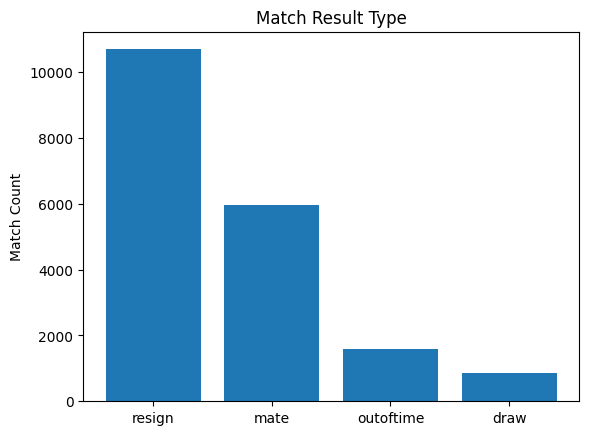

In [21]:
# lets look how mapatchesches are finished ? resign , mate ,outoftime or draw 
# game result status bar

victory_stat=df["victory_status"].value_counts()
plt.bar(victory_stat.index,victory_stat)
plt.title("Match Result Type")
plt.ylabel("Match Count")

Text(0.5, 1.0, 'Time Control - Match Count')

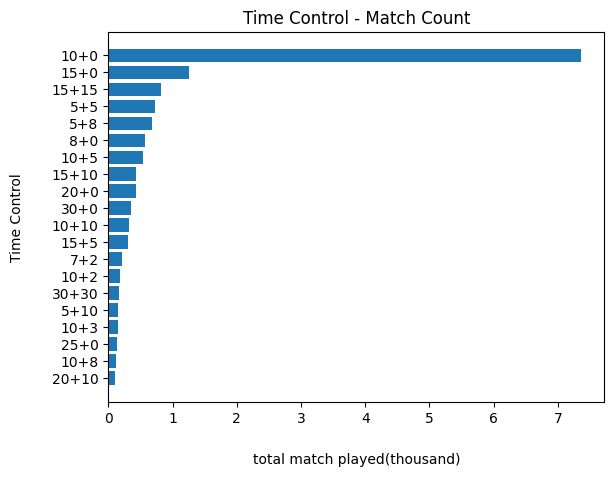

In [22]:
#  lets visualize time control(duration type) match count in horizontal bar chart

match_time=df["increment_code"].value_counts()[:20] # take first 20 value if we take all values it will be very big bar there is no need for that first 20 is good enough
match_time=match_time.sort_values(ascending=True)
x,y=(match_time.index,match_time)

plt.barh(x, y/1000) # we divide match counts to 1000 for   better visualization

plt.xlabel("total match played(thousand)",labelpad=20 ) # it is thousand because we divide with 1000
plt.ylabel("Time Control",labelpad=20)
plt.title("Time Control - Match Count")

Text(0.5, 1.0, 'Rated-Unrated Match Count')

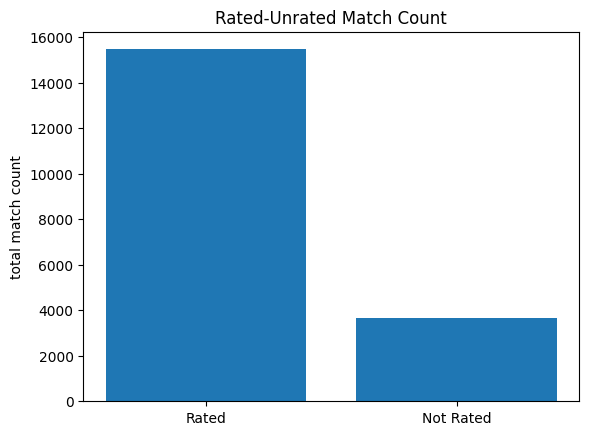

In [23]:
# lets see rated unrated match count 
rate_data=df["rated"].value_counts()
plt.bar(["Rated","Not Rated"],rate_data)
plt.ylabel("total match count")
plt.title("Rated-Unrated Match Count")

In [24]:
##########################################################

In [25]:
# lets see which openings are most used by players 
# most used first 50 opening
opening=df["Major Opening Name"].value_counts().sort_values(ascending=False)[:50]
opening

Major Opening Name
Sicilian Defense           2473
French Defense             1258
Queen's Pawn Game          1012
Italian Game                926
King's Pawn Game            871
Ruy Lopez                   812
English Opening             699
Scandinavian Defense        688
Caro-Kann Defense           559
Scotch Game                 441
Queen's Gambit Declined     377
Four Knights Game           344
Van't Kruijs Opening        342
Indian Game                 312
Bishop's Opening            310
Zukertort Opening           298
Philidor Defense            263
Queen's Gambit Refused      244
Queen's Gambit Accepted     242
Russian Game                242
Modern Defense              219
Horwitz Defense             208
Nimzowitsch Defense         194
King's Indian Defense       193
Philidor Defense #3         183
Philidor Defense #2         179
Slav Defense                178
Alekhine Defense            178
King's Knight Opening       175
Hungarian Opening           161
Nimzo-Larsen Attack  

In [26]:
plt.rcParams["figure.figsize"] = (8,12)

Text(0.0, 1.0, 'Opening Strategy-Match Count')

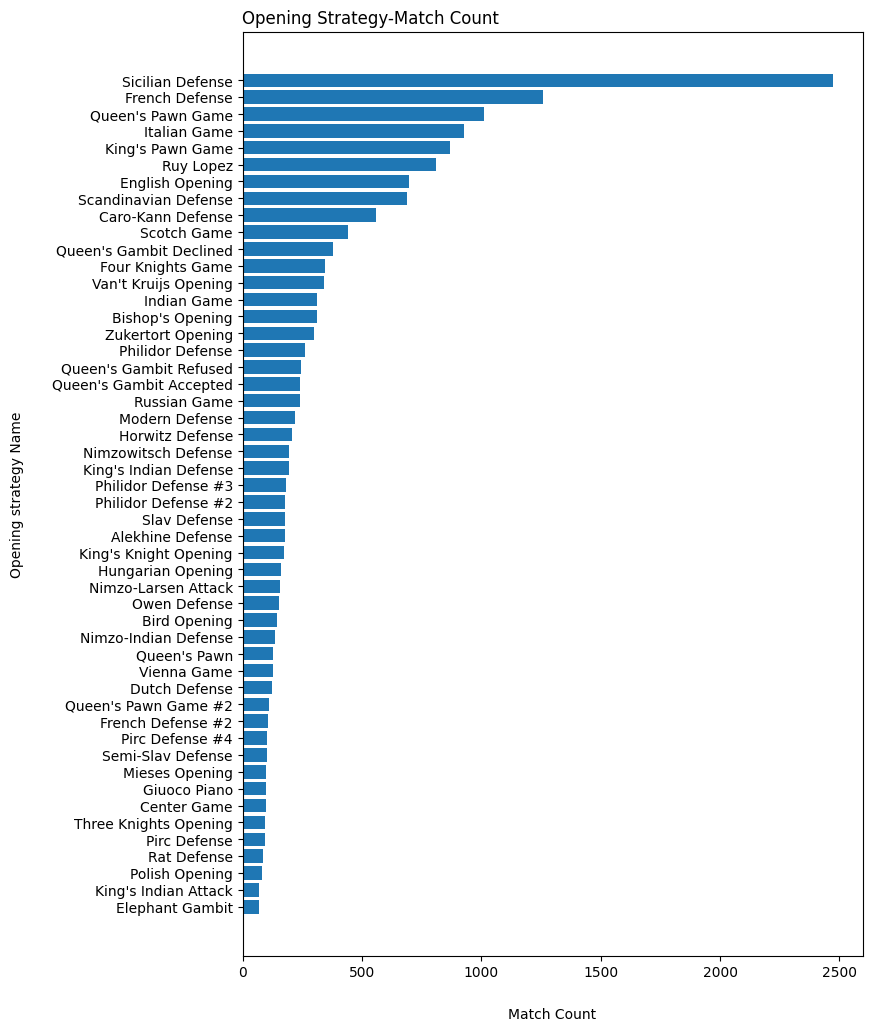

In [27]:
# now , we can visualize this in horizontal bar

opening.sort_values(ascending=True,inplace=True)
plt.barh(opening.index,opening)

plt.xlabel("Match Count",labelpad=20)
plt.ylabel("Opening strategy Name",labelpad=20)
plt.title("Opening Strategy-Match Count",loc="left")

In [28]:
#######################################################

In [29]:
df=df.reset_index()

In [30]:
# now lets use our columns that we create from other columns
# lets see between high rating players which openings they use mostly
# for this we can use match quality column

# lets look poor and excellent quality match openings

# for excellent quality match bar 
excellent_matches=df[df["match quality"]=="excellent"]
excellent_matches=excellent_matches["Major Opening Name"].value_counts()[:20].sort_values(ascending=True)

# for poor quality match bar
poor_matches=df[df["match quality"]=="poor"]
poor_matches=poor_matches["Major Opening Name"].value_counts()[:20].sort_values(ascending=True)

In [31]:
plt.rcParams["figure.figsize"] = (32,12) # execute this cell 2 times because it is not updating in first time

Text(0.5, 1.0, 'Poor Quality - Openings')

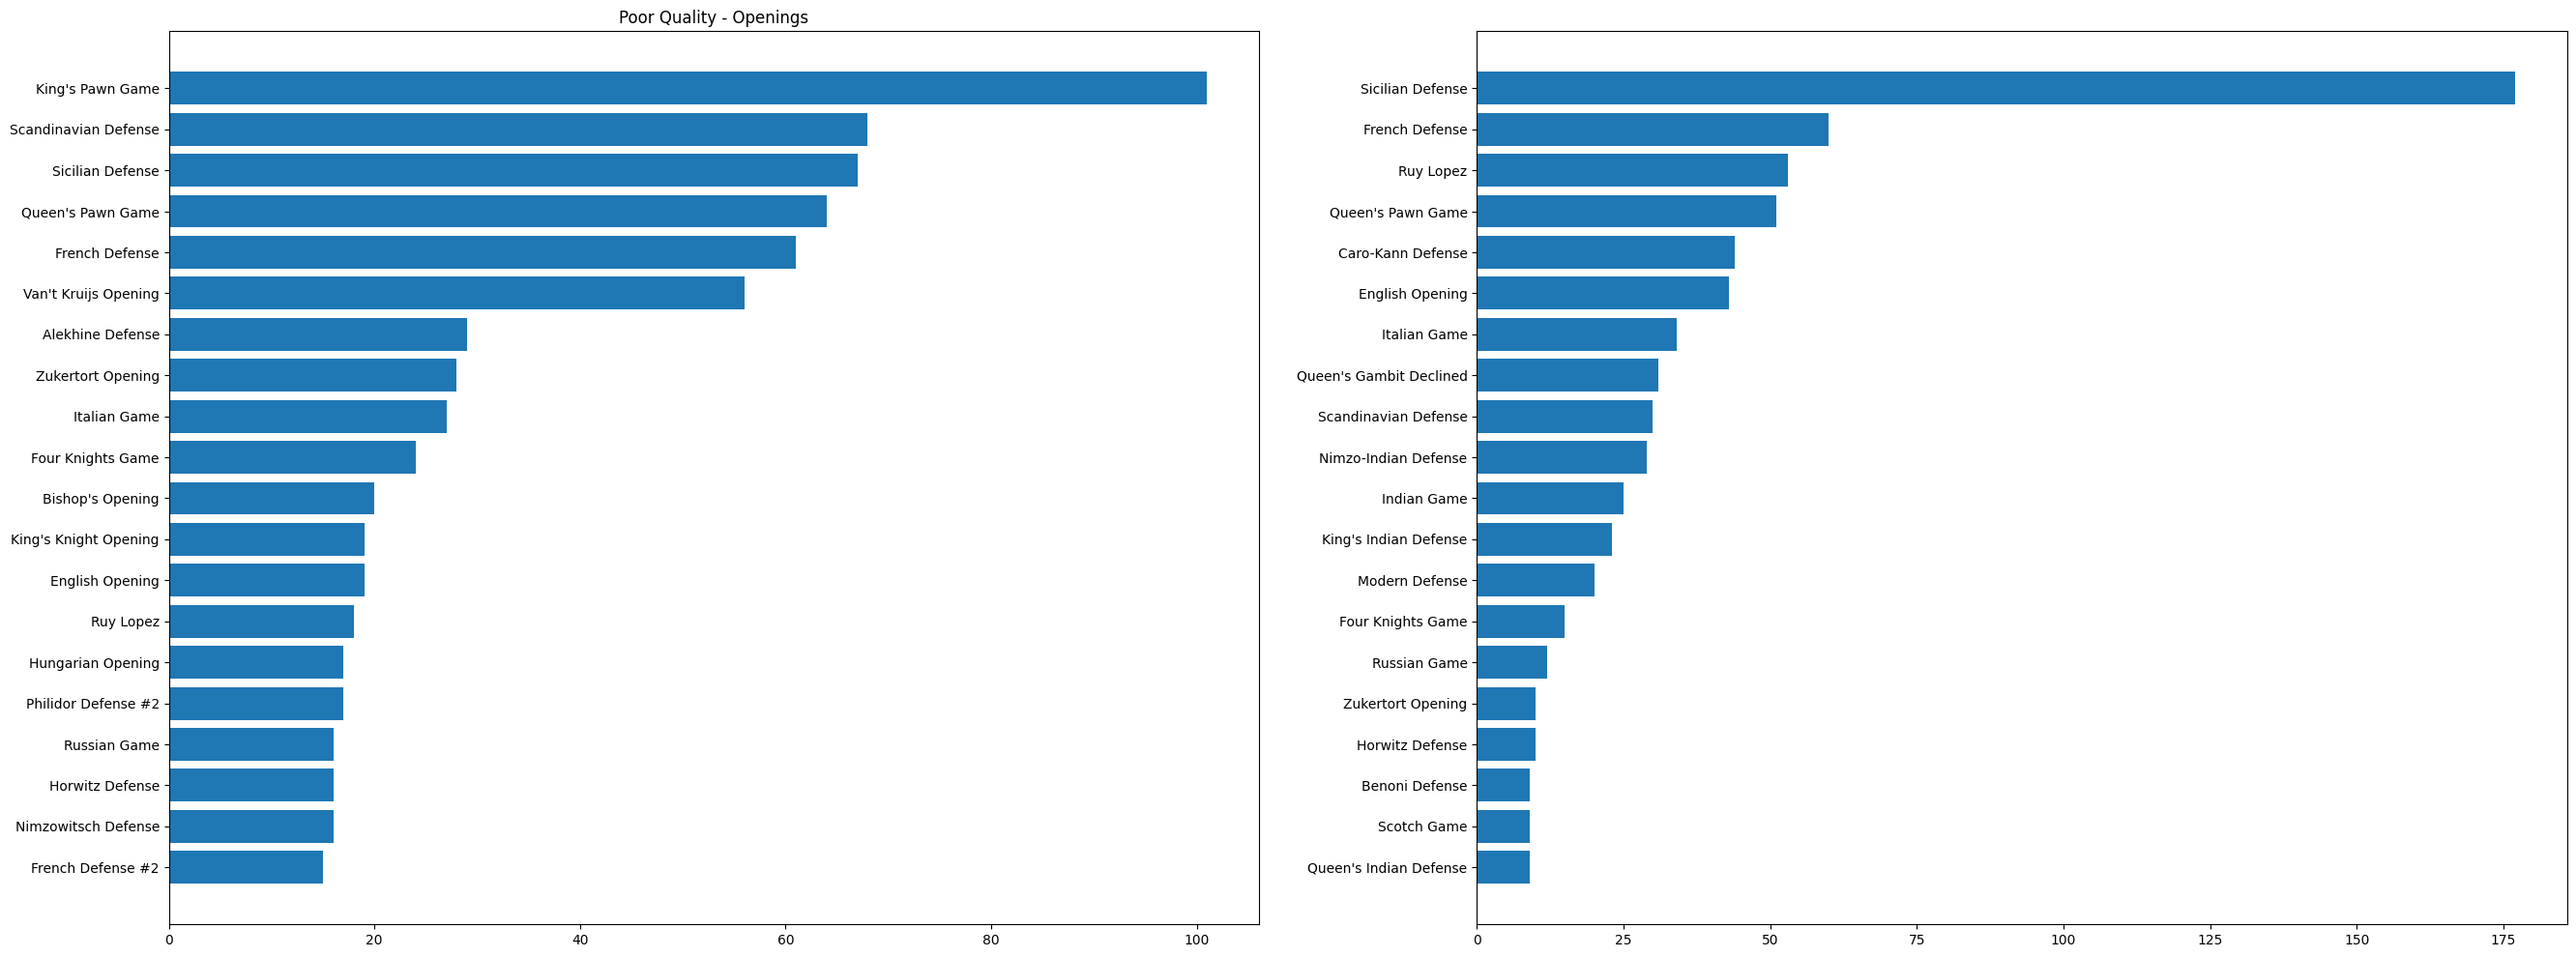

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2) 

ax1.barh(poor_matches.index,poor_matches)
ax1.set_title("Excellent Quality - Openings")
ax2.barh(excellent_matches.index,excellent_matches)
ax1.set_title("Poor Quality - Openings")

In [33]:
######################################################################

In [34]:
df["Count"]=1

In [35]:
opening_list=df["Major Opening Name"].value_counts()[:5].index.tolist()
opening_list

['Sicilian Defense',
 'French Defense',
 "Queen's Pawn Game",
 'Italian Game',
 "King's Pawn Game"]

In [36]:
opening_df=df[df["Major Opening Name"].isin(opening_list)]

In [37]:
quality_opening=opening_df.groupby(["match quality","Major Opening Name"])["Count"].sum().unstack()
quality_opening

Major Opening Name  French Defense  Italian Game  King's Pawn Game  \
match quality                                                        
excellent                       60            34                 1   
fair                           640           589               702   
good                           497           276                67   
poor                            61            27               101   

Major Opening Name  Queen's Pawn Game  Sicilian Defense  
match quality                                            
excellent                          51               177  
fair                              562              1196  
good                              335              1033  
poor                               64                67

In [38]:
plt.rcParams["figure.figsize"] = (10,8)

Text(0, 0.5, 'Match Number')

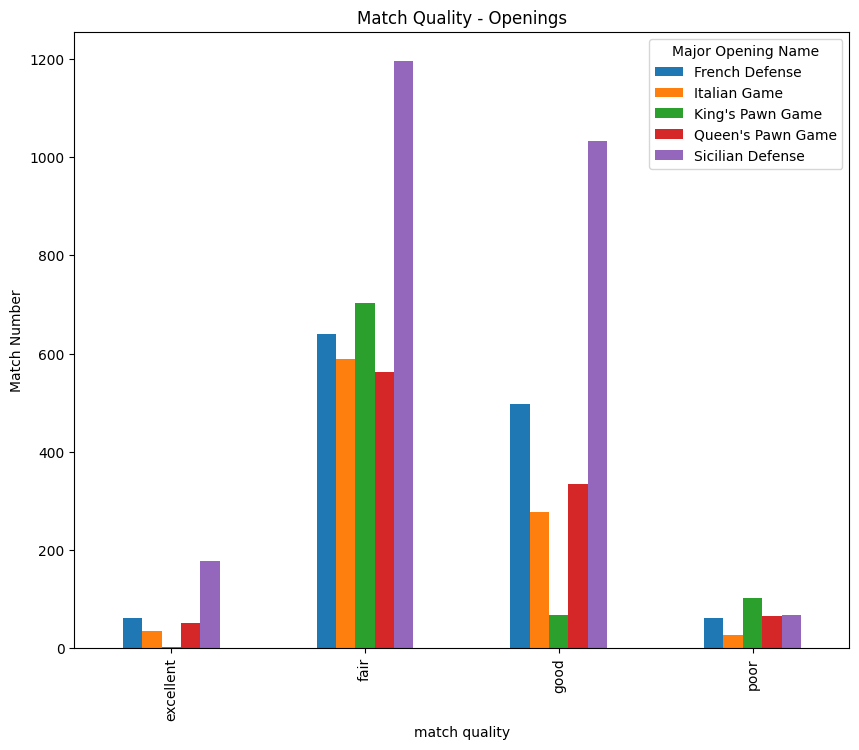

In [39]:
quality_opening.plot.bar()
plt.title("Match Quality - Openings")
plt.ylabel("Match Number")

In [40]:
#############################################

In [41]:
plt.rcParams["figure.figsize"] = (8,6) 

<Axes: >

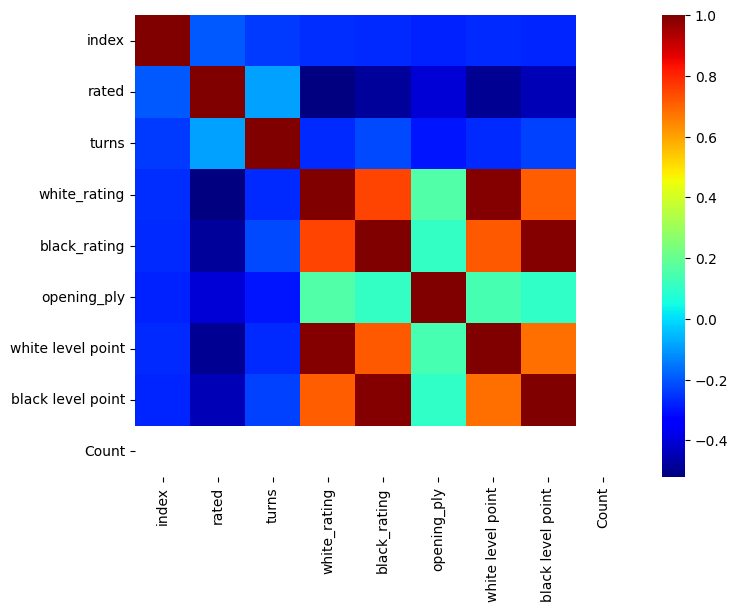

In [42]:
corr = df.corr(numeric_only=True) # take only numeric columns 
sns.heatmap(corr.corr(), annot=False, cmap='jet') # heatmap with numerical columns

In [43]:
plt.rcParams["figure.figsize"] = (8,6) 

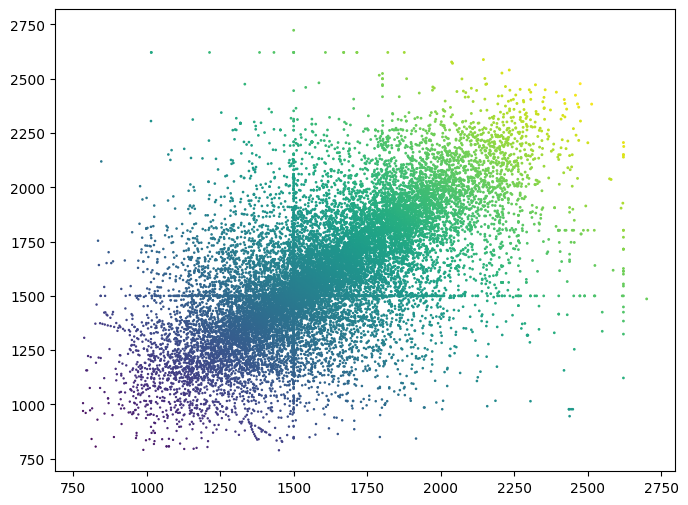

In [44]:
# lets see two opponents ratings in scatter plot
black_rating= df["black_rating"]
white_rating=  df["white_rating"]

plt.scatter(white_rating,black_rating,s=((black_rating+white_rating)//2)*0.0005,c=((black_rating+white_rating)//2)*0.0005) 
plt.rcParams["figure.figsize"] = (8,6) # execute this cell 2 times because it is not updating in first time

# there is an straight long line in 1500 in both side  , because starting rating is 1500 in lichess 